<a href="https://colab.research.google.com/github/lilyhartmann/Capstone/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [1]:
# for dataframes
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
from scipy import stats

# for web scraping
import requests
from bs4 import BeautifulSoup
import json
from pathlib import Path

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# for data balance
from imblearn.over_sampling import SMOTE

In [2]:
# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# scoring
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import average_precision_score, auc

# for hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Initial Data Prep

**Read in initial data**

In [3]:
# data = pd.read_csv("wildfire_data.csv", low_memory = False)
# data

In [4]:
# data.columns

Create small subset to send.

In [5]:
# to_send = data.iloc[:500, :].reset_index()

# # save to csv file
# path = "/Users/lmhartmann/Desktop/Weather/to_send.csv"
# data.to_csv(path)

Keep selected columns.

In [6]:
# to_keep = ["LONGITUDE", "LATITUDE", "OBJECTID",
#            "OWNER_DESCR",
#            "FIRE_YEAR", "DISCOVERY_DATE",
#            "DISCOVERY_DOY", "DISCOVERY_TIME",
#            "NWCG_CAUSE_CLASSIFICATION", "CONT_DATE",
#            "CONT_DOY", "CONT_TIME",
#            "STATE", "COUNTY", "FIPS_CODE", "FIPS_NAME", "FIRE_SIZE",
#            "FIRE_SIZE_CLASS"]

In [7]:
# raw_data = data.copy()
# data = data[to_keep].copy()
# data

Select only Natural fires and USFS fires.

In [8]:
# data = data.loc[(data["NWCG_CAUSE_CLASSIFICATION"] == "Natural")]
# data = data.loc[data["OWNER_DESCR"] == "USFS"]

Check datatypes and unique values.

In [9]:
# data.dtypes

In [10]:
# print(data["NWCG_CAUSE_CLASSIFICATION"].unique())
# print(len(data["STATE"].unique()))
# print(data["OWNER_DESCR"].unique())

Reset index.

In [11]:
# data = data.reset_index()
# data

Select further sumsbet of columns.

In [12]:
# # drop 'index', 'owner_descr', 'nwcg_cause_classification'
# data = data.drop(["index", "OWNER_DESCR", "NWCG_CAUSE_CLASSIFICATION"], axis = 1)
# data

Initial null check.

In [13]:
# data.isnull().sum()

In [14]:
# print("Percent Null: Discovery Time: ", 34/len(data)*100)
# print("Percent Null: Cont Date: ", 3987/len(data)*100)
# print("Percent Null: Cont Doy: ", 3987/len(data)*100)
# print("Percent Null: Cont Time: ", 4412/len(data)*100)
# print("Percent Null: County: ", 58658/len(data)*100)
# print("Percent Null: Fips Code: ", 58658/len(data)*100)
# print("Percent Null: Fips Name: ", 58658/len(data)*100)

Select portion of data and collect weather data and save.

In [15]:
# df1 = data.iloc[:5000, :]

In [16]:
# # get weather data

# # initalize new dataframe
# weather_df = pd.DataFrame(columns = ["DISCOVERY_DATE", "TIME", "TEMPERATURE",
#                                      "RELATIVE_HUMIDITY", "PRECIPITATION", "SURFACE_PRESSURE",
#                                      "CLOUD_COVER", "WIND_SPEED_10M", "WIND_SPEED_100M",
#                                      "WIND_GUSTS_10M"])

# # base website
# url = "https://archive-api.open-meteo.com/v1/archive?"

# # for loop through dataframe
# for row in range(len(df1)):

#     discov = datetime.strptime(str.rstrip(df1["DISCOVERY_DATE"][row][0:19]), "%Y/%m/%d %H:%M:%S")
#     prior = discov - timedelta(weeks = 2)
#     # convert into strings
#     discov_str = "&end_date=" + discov.strftime("%Y-%m-%d")
#     prior_str = "&start_date=" + prior.strftime("%Y-%m-%d")

#     long = "&longitude=" + str(df1["LONGITUDE"][row])
#     lat = "latitude=" + str(df1["LATITUDE"][row])

#     over_req = "&hourly=temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_gusts_10m"

#     final_url = url + lat + long + prior_str + discov_str + over_req

#     response = requests.get(final_url)
#     soup = BeautifulSoup(response.content, "html.parser")

#     site_json = json.loads(soup.text)

#     # go through every day in the two weeks and pull following information
#     time = site_json["hourly"]["time"]
#     temperature = site_json["hourly"]["temperature_2m"]
#     rel_hum = site_json["hourly"]["relative_humidity_2m"]
#     precip = site_json["hourly"]["precipitation"]
#     sur_pres = site_json["hourly"]["surface_pressure"]
#     cloud_cover = site_json["hourly"]["cloud_cover"]
#     wind_speed_10m = site_json["hourly"]["wind_speed_10m"]
#     wind_speed_100m = site_json["hourly"]["wind_speed_100m"]
#     wind_gusts_10m = site_json["hourly"]["wind_gusts_10m"]

#     for i in range(len(site_json["hourly"]["time"])):
#         row_to_add = [df1["DISCOVERY_DATE"][row], time[i], temperature[i],
#                       rel_hum[i], precip[i], sur_pres[i], cloud_cover[i],
#                       wind_speed_10m[i], wind_speed_100m[i], wind_gusts_10m[i]]

#         weather_df.loc[len(weather_df)] = row_to_add

#     if (row % 50 == 0):
#         print("Row: ", row)

#     # save to csv file
#     path = "/Users/lmhartmann/Desktop/Weather/df1.csv"
#     weather_df.to_csv(path)

# Load in Weather Data and Created Merged Data

In [17]:
# path = "/Users/lmhartmann/Desktop/Weather/df1.csv"
# weather = pd.read_csv(path, low_memory = False)
# weather

Add the 'fire_number' (id_value) to weather dataframe.

In [18]:
# # each fire now has 360 rows
# # create new column and name 0 through 4999 identifying for each fire

# weather["fire_number"] = np.nan

# i = 0
# for row in range(len(weather)):

#     weather["fire_number"][row] = i

#     if ((row + 1) % 360) == 0:
#         i += 1

# weather

In [19]:
# # make weather to int
# weather["fire_number"] = weather["fire_number"].astype(int)

# # create "fire_number" equal to index
# df1['fire_number'] = df1.index
# df1

Merge weather info with fire info.

In [20]:
# # merge df1 and weather on "fire_number"
# data = weather.merge(df1, on='fire_number')

# data

### Save to create dataset we will work with/

Check for nulls.

In [21]:
# data.isnull().sum()

In [22]:
# print("Percent Null: Cont Date: ", 1800/len(data)*100)
# print("Percent Null: Cont Doy: ", 1800/len(data)*100)
# print("Percent Null: Cont Time: ", 2160/len(data)*100)
# print("Percent Null: County: ", 156240/len(data)*100)
# print("Percent Null: Fips Code: ", 156240/len(data)*100)
# print("Percent Null: Fips Name: ", 156240/len(data)*100)

Further narrow columns.

In [23]:
# # decide to keep
# to_keep = ["LONGITUDE", "LATITUDE",
#            "DISCOVERY_DATE_x", "TIME", "TEMPERATURE",
#            "RELATIVE_HUMIDITY", "PRECIPITATION", "SURFACE_PRESSURE",
#            "CLOUD_COVER", "WIND_SPEED_10M", "WIND_SPEED_100M",
#            "WIND_GUSTS_10M", "STATE",
#            "FIRE_SIZE", "FIRE_SIZE_CLASS"]

# data = data[to_keep].copy()
# data

Export.

In [24]:
# # export
# path = "/Users/lmhartmann/Desktop/Capstone/data_merged.csv"
# data.to_csv(path)

# Data Exploration

Load in data.

In [3]:
path = "/content/drive/MyDrive/Colab_Notebooks/data_merged.csv"
data = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)
data

,LONGITUDE,LATITUDE,DISCOVERY_DATE_x,TIME,TEMPERATURE,RELATIVE_HUMIDITY,PRECIPITATION,SURFACE_PRESSURE,CLOUD_COVER,WIND_SPEED_10M,WIND_SPEED_100M,WIND_GUSTS_10M,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T00:00,17.3,26,0.0,822.5,14,14.8,22.0,46.8,CA,0.25,A
1,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T01:00,15.9,30,0.0,821.3,15,13.9,20.9,45.0,CA,0.25,A
2,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T02:00,13.2,40,0.0,819.7,16,10.6,18.6,40.0,CA,0.25,A
3,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T03:00,10.9,49,0.0,818.5,14,6.3,15.6,29.2,CA,0.25,A
4,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T04:00,11.5,45,0.0,818.8,4,7.2,11.4,22.3,CA,0.25,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799995,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T19:00,27.0,15,0.0,837.2,0,5.9,7.8,23.4,OR,0.10,A
1799996,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T20:00,28.1,16,0.0,837.6,0,7.0,9.6,27.4,OR,0.10,A
1799997,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T21:00,28.8,17,0.0,837.6,0,7.8,10.7,29.5,OR,0.10,A
1799998,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T22:00,29.0,18,0.0,837.3,0,8.4,11.4,31.3,OR,0.10,A


Fire Size Histogram

<Axes: xlabel='FIRE_SIZE_CLASS', ylabel='Count'>

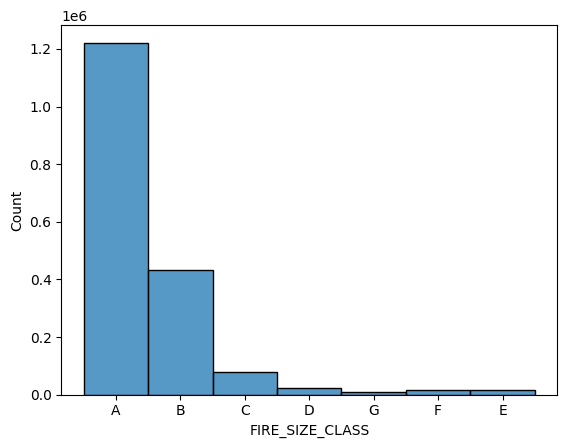

In [26]:
sns.histplot(data = data, x = "FIRE_SIZE_CLASS")

## Outliers

In [27]:
data.isnull().sum()

LONGITUDE            0
LATITUDE             0
DISCOVERY_DATE_x     0
TIME                 0
TEMPERATURE          0
RELATIVE_HUMIDITY    0
PRECIPITATION        0
SURFACE_PRESSURE     0
CLOUD_COVER          0
WIND_SPEED_10M       0
WIND_SPEED_100M      0
WIND_GUSTS_10M       0
STATE                0
FIRE_SIZE            0
FIRE_SIZE_CLASS      0
dtype: int64

In [28]:
def outliers_IQR(col):
    q1 = col.quantile(0.25)

    q3 = col.quantile(0.75)

    IQR = q3 - q1

    outliers = col[((col < (q1 - 1.5 * IQR)) | (col > (q3 + 1.5 * IQR)))]

    return outliers

In [29]:
def outliers_sd(col):
    three_sd = 3 * col.std()

    median = col.median()

    outliers = col[(col > (median + three_sd)) | (col < (median - three_sd))]

    return outliers

In [30]:
no_outliers = ["LONGITUDE", "LATITUDE", "DISCOVERY_DATE_x", "TIME",
               "STATE", "FIRE_SIZE", "FIRE_SIZE_CLASS"]

for col in data.columns:
  if col in no_outliers:
    pass
  else:
    outs_IQR = outliers_IQR(data[col])
    print("\nPercent " + col + " Outliers by IQR: ",
          len(outs_IQR)/len(data)*100)

    outs_sd = outliers_sd(data[col])
    print("Percent " + col + " Outliers by Standard Deviation: ",
          len(outs_sd)/len(data)*100)


Percent TEMPERATURE Outliers by IQR:  0.2205
Percent TEMPERATURE Outliers by Standard Deviation:  0.11905555555555555

Percent RELATIVE_HUMIDITY Outliers by IQR:  0.0
Percent RELATIVE_HUMIDITY Outliers by Standard Deviation:  0.0

Percent PRECIPITATION Outliers by IQR:  5.974111111111111
Percent PRECIPITATION Outliers by Standard Deviation:  1.2362777777777778

Percent SURFACE_PRESSURE Outliers by IQR:  2.964722222222222
Percent SURFACE_PRESSURE Outliers by Standard Deviation:  1.8472222222222223

Percent CLOUD_COVER Outliers by IQR:  5.544722222222222
Percent CLOUD_COVER Outliers by Standard Deviation:  4.3597777777777775

Percent WIND_SPEED_10M Outliers by IQR:  3.3813888888888886
Percent WIND_SPEED_10M Outliers by Standard Deviation:  1.7443333333333335

Percent WIND_SPEED_100M Outliers by IQR:  2.277388888888889
Percent WIND_SPEED_100M Outliers by Standard Deviation:  1.4459444444444445

Percent WIND_GUSTS_10M Outliers by IQR:  1.9533333333333334
Percent WIND_GUSTS_10M Outliers by

In [31]:
# # create a version with all outliers removed
# # use standard deviation because it is a better representation of the data
# # will use z-score

# no_outliers = ["LONGITUDE", "LATITUDE", "DISCOVERY_DATE_x", "TIME",
#                "STATE", "FIRE_SIZE", "FIRE_SIZE_CLASS"]
# data_no_outliers = data.copy()

# for col in data.columns:
#   if col in no_outliers:
#     pass
#   else:
#     outs_sd = outliers_sd(data[col])
#     for ind in outs_sd.index:
#       if ind in data_no_outliers.index:
#         data_no_outliers.drop(ind, inplace = True)

# # NOT WORKING
# # FIGURE OUT HOW TO CHECK INDICES

# # print out
# print("Size Before Outlier Removal: ", len(data))
# print("Size After Outlier Removal: ", len(data_no_outliers))


In [32]:
# # save no_outliers
# data_no_outliers.to_csv("merged_no_outliers.csv")

In [4]:
# read in no_outliers
path = "/content/drive/MyDrive/Colab_Notebooks/data_no_outliers.csv"
data_no_outliers = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)
data_no_outliers

,LONGITUDE,LATITUDE,DISCOVERY_DATE_x,TIME,TEMPERATURE,RELATIVE_HUMIDITY,PRECIPITATION,SURFACE_PRESSURE,CLOUD_COVER,WIND_SPEED_10M,WIND_SPEED_100M,WIND_GUSTS_10M,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T00:00,17.3,26,0.0,822.5,14,14.8,22.0,46.8,CA,0.25,A
1,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T01:00,15.9,30,0.0,821.3,15,13.9,20.9,45.0,CA,0.25,A
2,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T02:00,13.2,40,0.0,819.7,16,10.6,18.6,40.0,CA,0.25,A
3,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T03:00,10.9,49,0.0,818.5,14,6.3,15.6,29.2,CA,0.25,A
4,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T04:00,11.5,45,0.0,818.8,4,7.2,11.4,22.3,CA,0.25,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633144,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T19:00,27.0,15,0.0,837.2,0,5.9,7.8,23.4,OR,0.10,A
1633145,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T20:00,28.1,16,0.0,837.6,0,7.0,9.6,27.4,OR,0.10,A
1633146,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T21:00,28.8,17,0.0,837.6,0,7.8,10.7,29.5,OR,0.10,A
1633147,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T22:00,29.0,18,0.0,837.3,0,8.4,11.4,31.3,OR,0.10,A


## Visualizations

### Histograms

<Axes: xlabel='WIND_GUSTS_10M', ylabel='Count'>

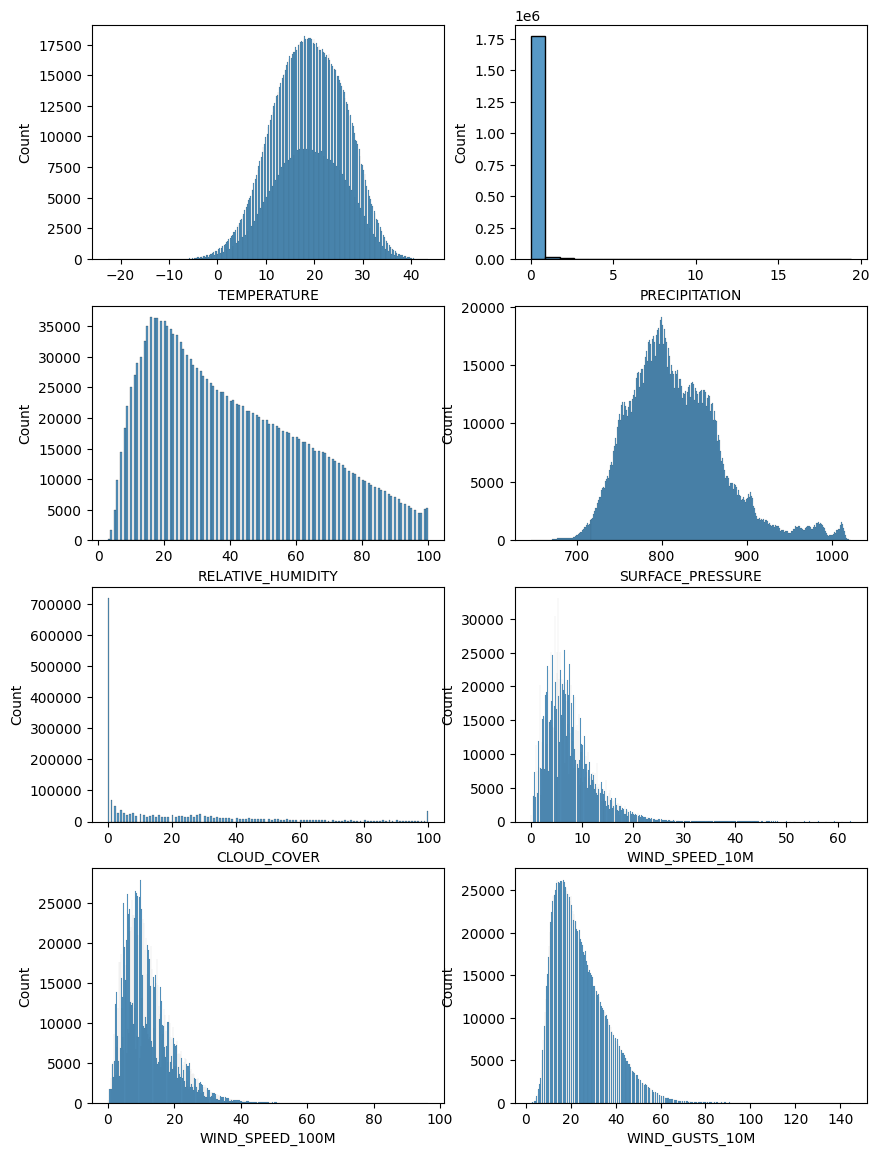

In [34]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 14))

sns.histplot(data = data, x = "TEMPERATURE", ax = axes[0, 0])
sns.histplot(data = data, x = "RELATIVE_HUMIDITY", ax = axes[1, 0])
sns.histplot(data = data, x = "PRECIPITATION", ax = axes[0, 1])
sns.histplot(data = data, x = "SURFACE_PRESSURE", ax = axes[1, 1])
sns.histplot(data = data, x = "CLOUD_COVER", ax = axes[2, 0])
sns.histplot(data = data, x = "WIND_SPEED_10M", ax = axes[2, 1])
sns.histplot(data = data, x = "WIND_SPEED_100M", ax = axes[3, 0])
sns.histplot(data = data, x = "WIND_GUSTS_10M", ax = axes[3, 1])

#### Seperate DataFrames
Create several dataframes by fire size class to visualize each class seperately.

In [35]:
size_A = data.loc[data["FIRE_SIZE_CLASS"] == "A"].reset_index().drop(["index"], axis = 1)
size_B = data.loc[data["FIRE_SIZE_CLASS"] == "B"].reset_index().drop(["index"], axis = 1)
size_C = data.loc[data["FIRE_SIZE_CLASS"] == "C"].reset_index().drop(["index"], axis = 1)
size_D = data.loc[data["FIRE_SIZE_CLASS"] == "D"].reset_index().drop(["index"], axis = 1)
size_E = data.loc[data["FIRE_SIZE_CLASS"] == "E"].reset_index().drop(["index"], axis = 1)
size_F = data.loc[data["FIRE_SIZE_CLASS"] == "F"].reset_index().drop(["index"], axis = 1)
size_G = data.loc[data["FIRE_SIZE_CLASS"] == "G"].reset_index().drop(["index"], axis = 1)

fire_classes = ["A", "B", "C", "D", "E", "F", "G"]

#### Temperature by Fire Size

Text(0.5, 0.98, 'Temperature by Fire Size Class')

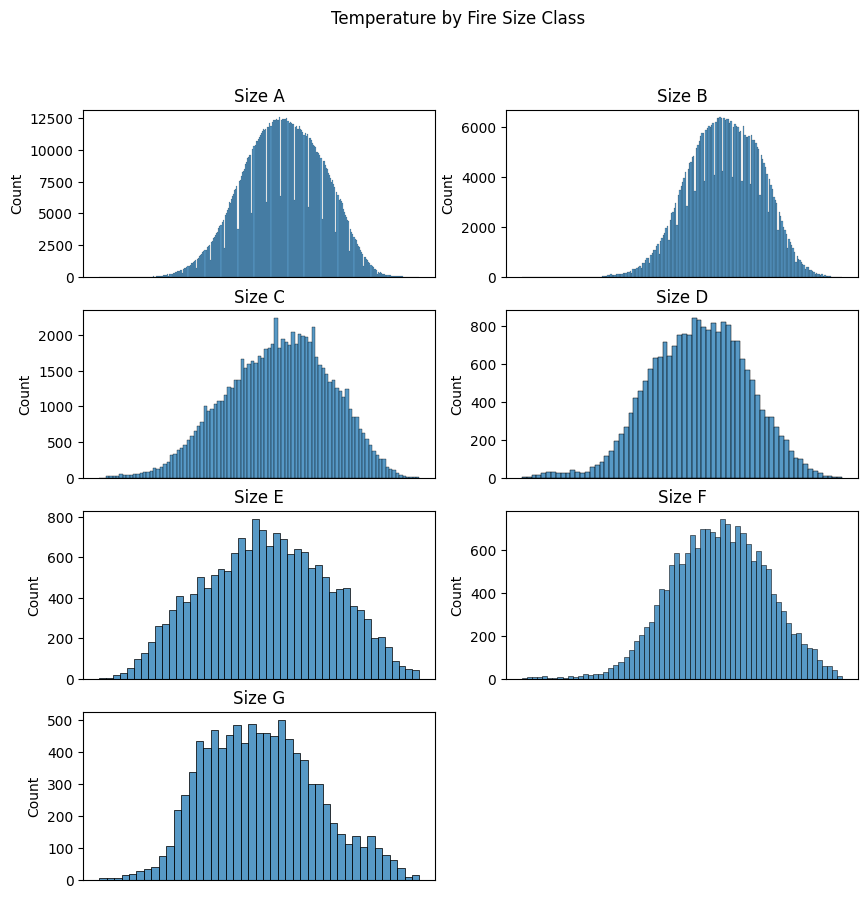

In [36]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))

sns.histplot(data = size_A, x = "TEMPERATURE", ax = axes[0, 0])
sns.histplot(data = size_B, x = "TEMPERATURE", ax = axes[0,1])
sns.histplot(data = size_C, x = "TEMPERATURE", ax = axes[1,0])
sns.histplot(data = size_D, x = "TEMPERATURE", ax = axes[1,1])
sns.histplot(data = size_E, x = "TEMPERATURE", ax = axes[2,0])
sns.histplot(data = size_F, x = "TEMPERATURE", ax = axes[2,1])
sns.histplot(data = size_G, x = "TEMPERATURE", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Temperature by Fire Size Class")

#### Relative Humidity by Fire Size

Text(0.5, 0.98, 'Relative Humidity by Fire Size Class')

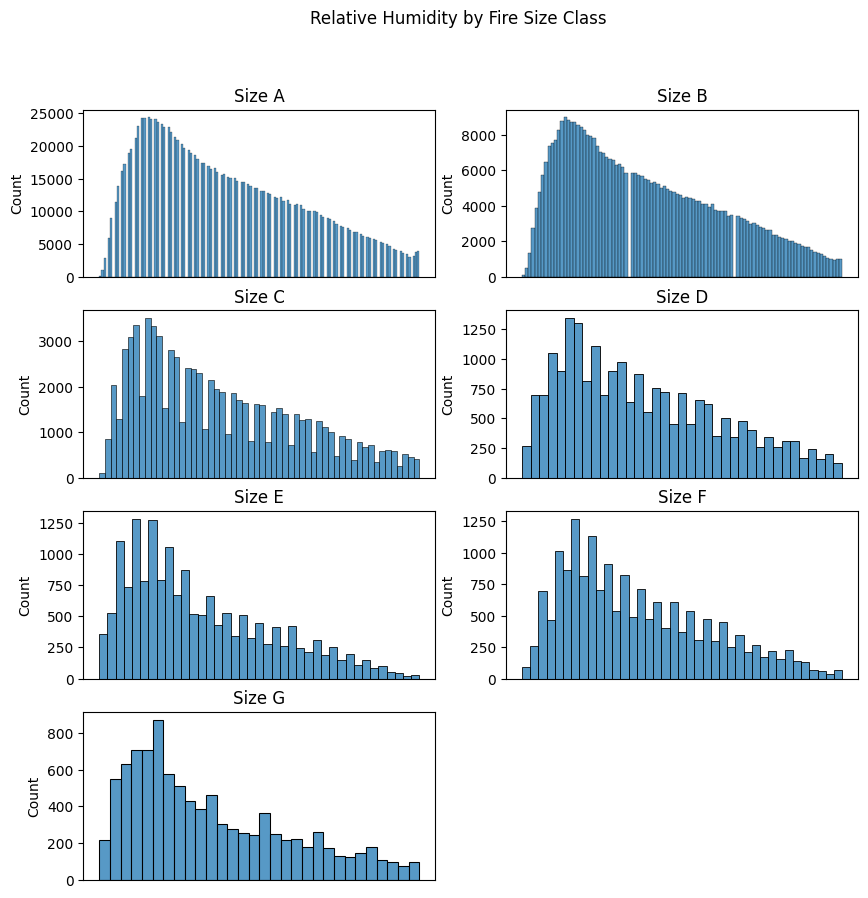

In [37]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "RELATIVE_HUMIDITY", ax = axes[0, 0])
sns.histplot(data = size_B, x = "RELATIVE_HUMIDITY", ax = axes[0,1])
sns.histplot(data = size_C, x = "RELATIVE_HUMIDITY", ax = axes[1,0])
sns.histplot(data = size_D, x = "RELATIVE_HUMIDITY", ax = axes[1,1])
sns.histplot(data = size_E, x = "RELATIVE_HUMIDITY", ax = axes[2,0])
sns.histplot(data = size_F, x = "RELATIVE_HUMIDITY", ax = axes[2,1])
sns.histplot(data = size_G, x = "RELATIVE_HUMIDITY", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Relative Humidity by Fire Size Class")

#### Precipitation by Fire Size

Text(0.5, 0.98, 'Precipitation by Fire Size Class')

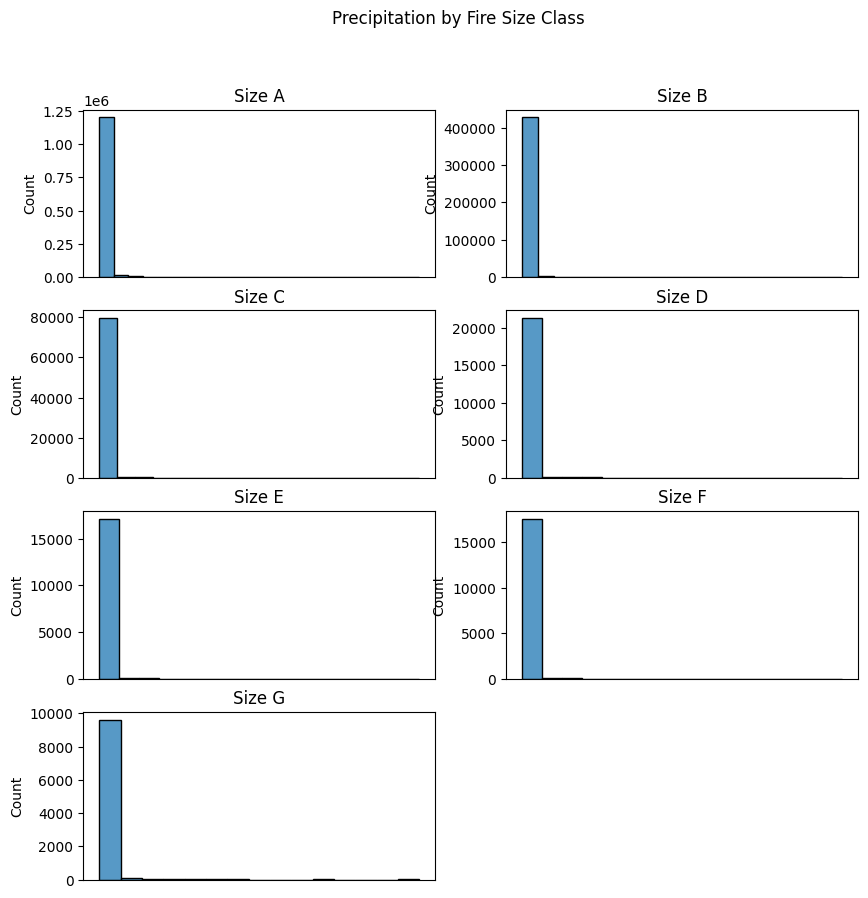

In [38]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "PRECIPITATION", ax = axes[0, 0])
sns.histplot(data = size_B, x = "PRECIPITATION", ax = axes[0,1])
sns.histplot(data = size_C, x = "PRECIPITATION", ax = axes[1,0])
sns.histplot(data = size_D, x = "PRECIPITATION", ax = axes[1,1])
sns.histplot(data = size_E, x = "PRECIPITATION", ax = axes[2,0])
sns.histplot(data = size_F, x = "PRECIPITATION", ax = axes[2,1])
sns.histplot(data = size_G, x = "PRECIPITATION", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Precipitation by Fire Size Class")

#### Surface Pressure by Fire Size

Text(0.5, 0.98, 'Surface Pressure by Fire Size Class')

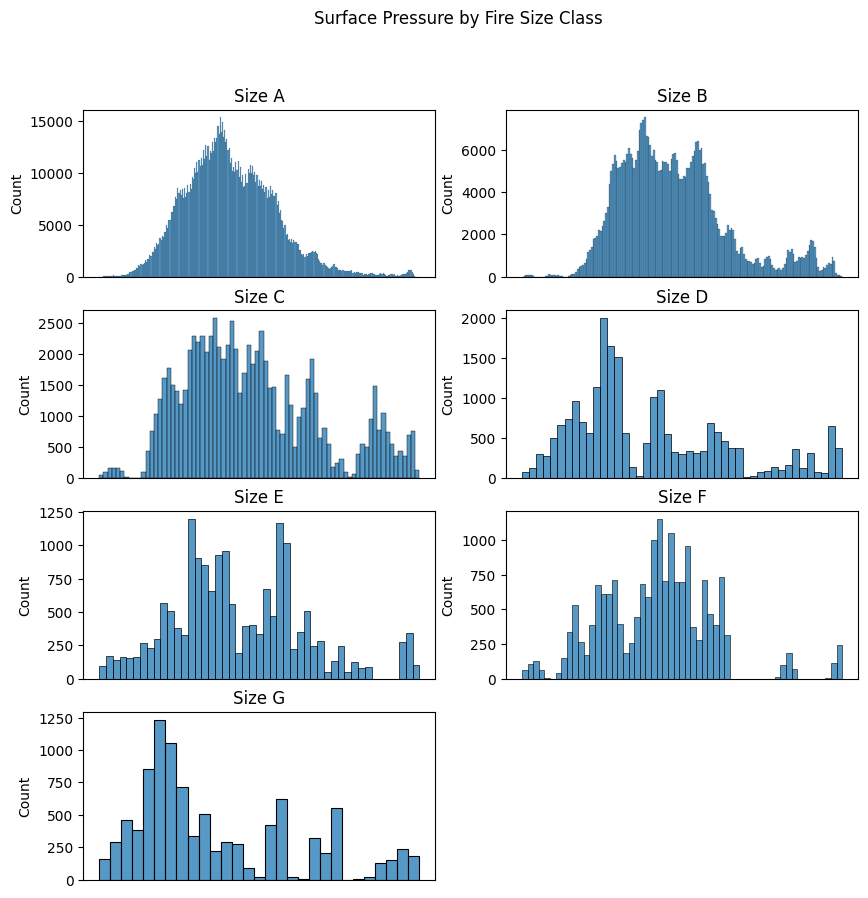

In [39]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "SURFACE_PRESSURE", ax = axes[0, 0])
sns.histplot(data = size_B, x = "SURFACE_PRESSURE", ax = axes[0,1])
sns.histplot(data = size_C, x = "SURFACE_PRESSURE", ax = axes[1,0])
sns.histplot(data = size_D, x = "SURFACE_PRESSURE", ax = axes[1,1])
sns.histplot(data = size_E, x = "SURFACE_PRESSURE", ax = axes[2,0])
sns.histplot(data = size_F, x = "SURFACE_PRESSURE", ax = axes[2,1])
sns.histplot(data = size_G, x = "SURFACE_PRESSURE", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Surface Pressure by Fire Size Class")

#### Cloud Cover by Fire Size

Text(0.5, 0.98, 'Cloud Cover by Fire Size Class')

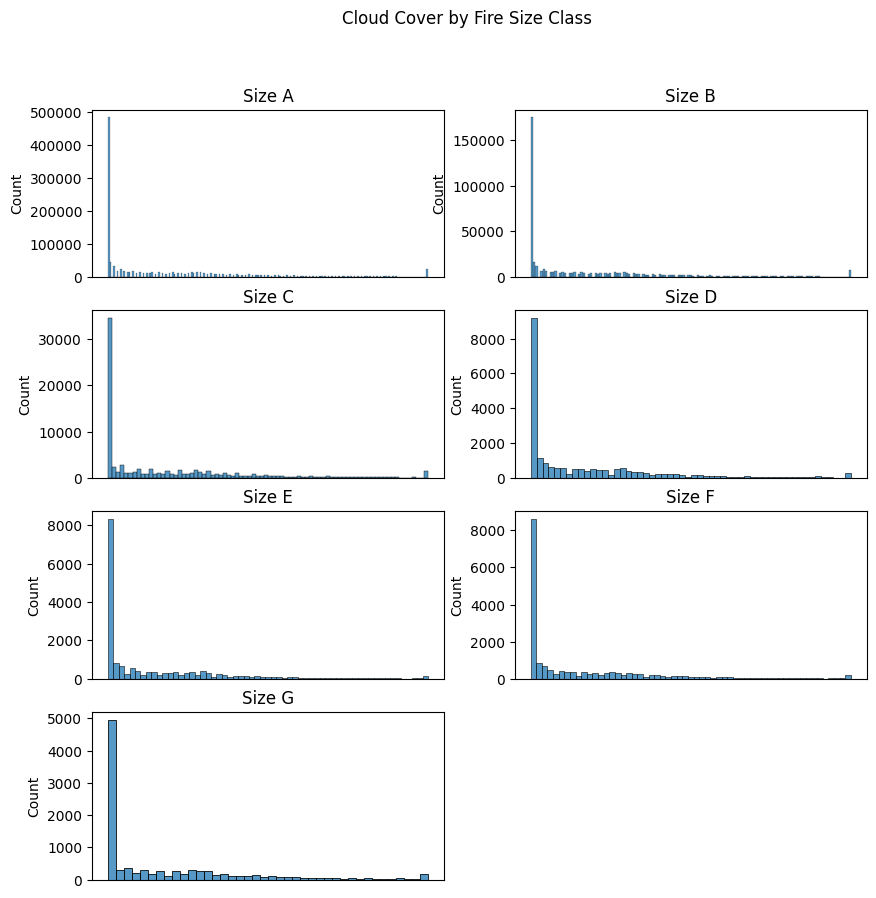

In [40]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "CLOUD_COVER", ax = axes[0, 0])
sns.histplot(data = size_B, x = "CLOUD_COVER", ax = axes[0,1])
sns.histplot(data = size_C, x = "CLOUD_COVER", ax = axes[1,0])
sns.histplot(data = size_D, x = "CLOUD_COVER", ax = axes[1,1])
sns.histplot(data = size_E, x = "CLOUD_COVER", ax = axes[2,0])
sns.histplot(data = size_F, x = "CLOUD_COVER", ax = axes[2,1])
sns.histplot(data = size_G, x = "CLOUD_COVER", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Cloud Cover by Fire Size Class")

#### Wind Speed 10m Above by Fire Size

Text(0.5, 0.98, 'Wind Speed 10m Above by Fire Size Class')

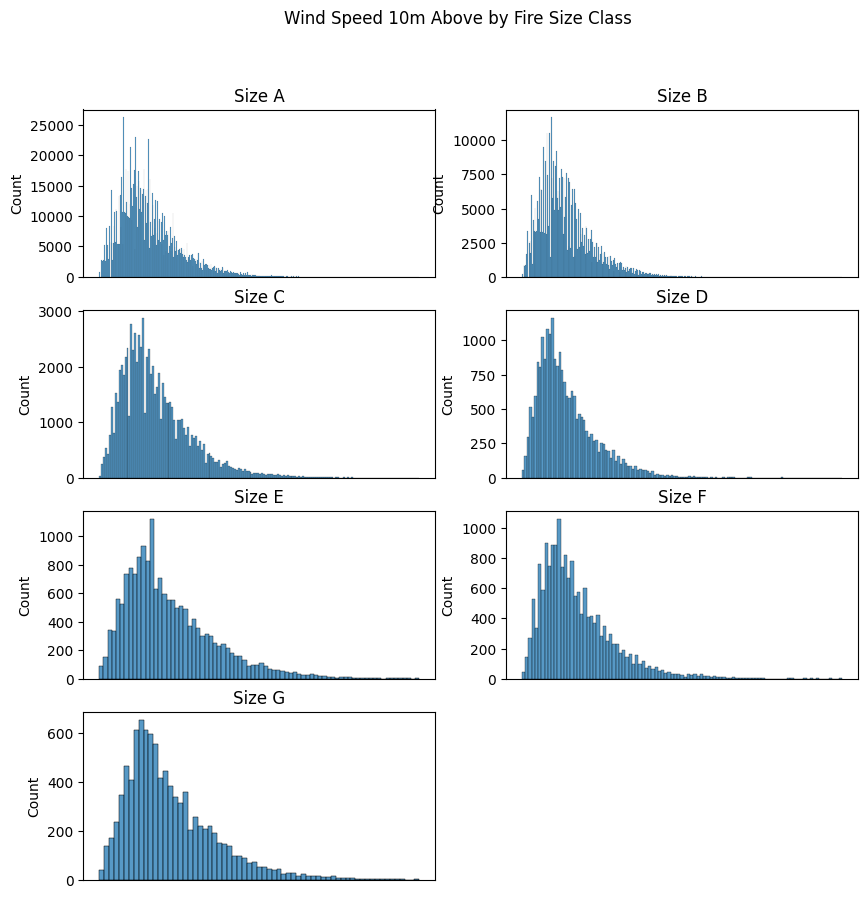

In [41]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_SPEED_10M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_SPEED_10M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_SPEED_10M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_SPEED_10M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_SPEED_10M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_SPEED_10M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_SPEED_10M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Speed 10m Above by Fire Size Class")

#### Wind Speed 100m Above by Fire Size

Text(0.5, 0.98, 'Wind Speed 100m Above by Fire Size Class')

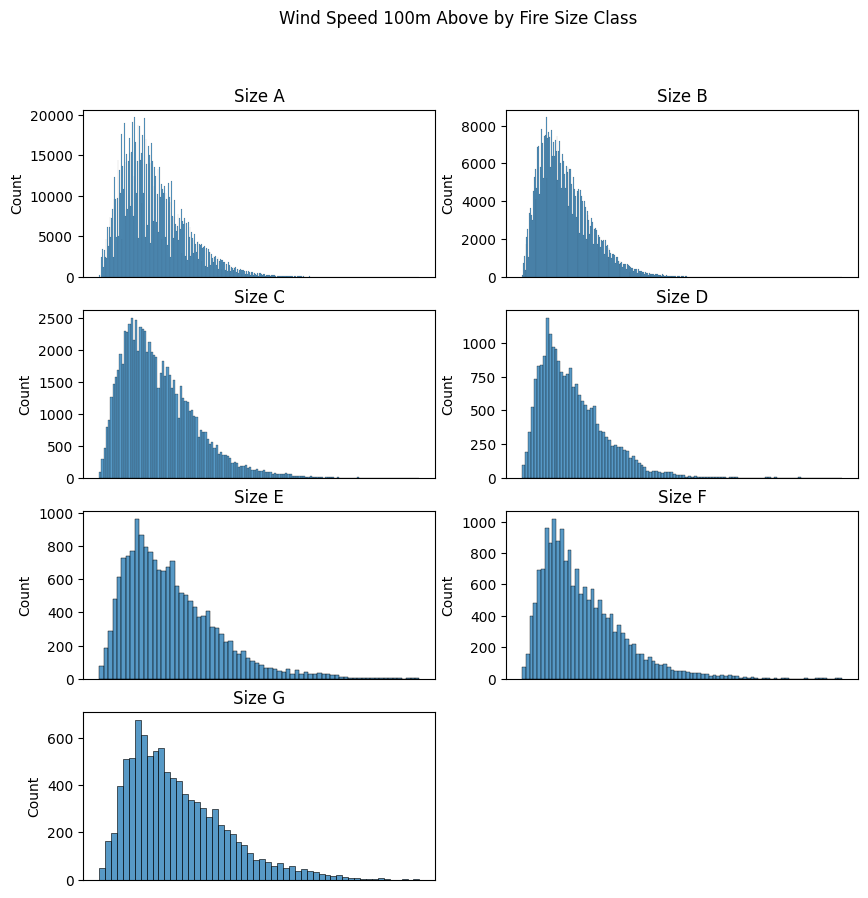

In [42]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_SPEED_100M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_SPEED_100M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_SPEED_100M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_SPEED_100M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_SPEED_100M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_SPEED_100M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_SPEED_100M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Speed 100m Above by Fire Size Class")

#### Wind Gusts 10m Above by Fire Size

Text(0.5, 0.98, 'Wind Gusts 10m Above by Fire Size Class')

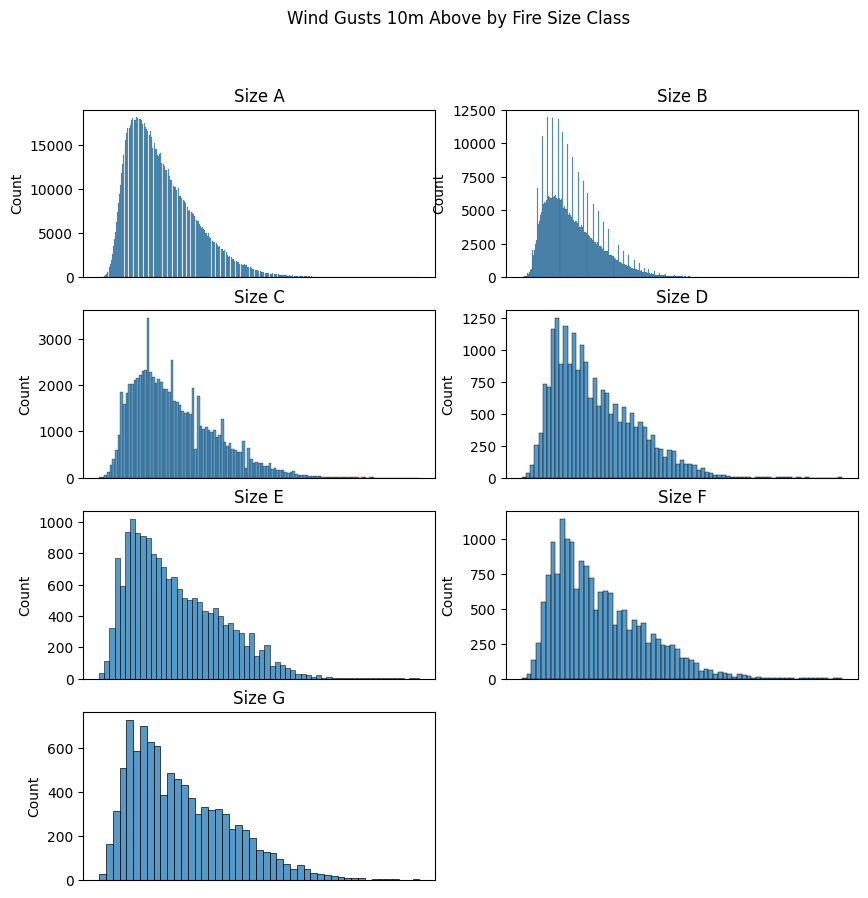

In [43]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_GUSTS_10M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_GUSTS_10M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_GUSTS_10M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_GUSTS_10M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_GUSTS_10M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_GUSTS_10M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_GUSTS_10M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Gusts 10m Above by Fire Size Class")

### Geo Graphing

Load in Geo Data.

In [44]:
import geopandas as gpd
from shapely.geometry import Polygon

# wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

path = "/content/drive/MyDrive/Colab_Notebooks/cb_2018_us_state_500k"
gdf = gpd.read_file(path)
gdf = gdf.merge(data,left_on='STUSPS',right_on='STATE')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RELATIVE_HUMIDITY,PRECIPITATION,SURFACE_PRESSURE,CLOUD_COVER,WIND_SPEED_10M,WIND_SPEED_100M,WIND_GUSTS_10M,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",...,52,0.0,997.4,1,12.9,24.2,25.2,MS,0.01,A
1,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",...,54,0.0,997.7,2,13.7,26.1,21.2,MS,0.01,A
2,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",...,58,0.0,998.4,2,12.5,24.4,20.9,MS,0.01,A
3,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",...,62,0.0,998.9,1,10.7,21.9,17.6,MS,0.01,A
4,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",...,66,0.0,999.0,0,9.5,19.8,15.1,MS,0.01,A


#### Temperature by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "TEMPERATURE",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Temperature by State")
ax.set_axis_off()

#### Relative Humidity by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "RELATIVE_HUMIDITY",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Relative Humidity by State")
ax.set_axis_off()

#### Precipitation by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "PRECIPITATION",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Precipitation by State")
ax.set_axis_off()

#### Surface Pressure by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "SURFACE_PRESSURE",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Surface Pressure by State")
ax.set_axis_off()

#### Cloud Cover by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "CLOUD_COVER",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Cloud Cover by State")
ax.set_axis_off()

#### Wind Speed 10m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_SPEED_10M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Speed 10m Above by State")
ax.set_axis_off()

#### Wind Speed 100m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_SPEED_100M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Speed 100m Above by State")
ax.set_axis_off()

#### Wind Gusts 10m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_GUSTS_10M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Gusts 10m Above by State")
ax.set_axis_off()

# Modeling

In [ ]:
# Final Load In
path = "/content/drive/MyDrive/Colab_Notebooks/data_merged.csv"
data = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)

path = "/content/drive/MyDrive/Colab_Notebooks/data_no_outliers.csv"
data_no_outliers = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)

## Preprocessing

Look at data balance.

In [5]:
print("With Outliers (percent): ")
data_counts = data["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100
data_counts

With Outliers (percent): 


FIRE_SIZE_CLASS
A    67.86
B    24.00
C     4.46
D     1.20
F     0.98
E     0.96
G     0.54
Name: proportion, dtype: float64

In [6]:
print("Without Outliers (percent): ")
data_no_outliers["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100

Without Outliers (percent): 


FIRE_SIZE_CLASS
A    68.718408
B    23.457137
C     4.224844
D     1.114656
F     0.994275
E     0.949393
G     0.541286
Name: proportion, dtype: float64

In both, as the fire size increases, i.e. the letter label increases, the number of fires decrease.

### Balance Data

In [7]:
to_keep = ["TEMPERATURE", "RELATIVE_HUMIDITY",
           "PRECIPITATION", "SURFACE_PRESSURE",
           "CLOUD_COVER", "WIND_SPEED_10M",
           "WIND_SPEED_100M", "WIND_GUSTS_10M"]
target = ["FIRE_SIZE_CLASS"]

oversample = SMOTE()

X = data[to_keep].copy()
y = data[target].copy()

data_no_outliers_X = data_no_outliers[to_keep].copy()
data_no_outliers_y = data_no_outliers[target].copy()

bal_X, bal_y = oversample.fit_resample(X, y)
bal_no_outliers_X, bal_no_outliers_y = oversample.fit_resample(data_no_outliers_X,
                                                               data_no_outliers_y)

# add y column, then rename
bal_X["FIRE_SIZE_CLASS"] = bal_y
data_balanced = bal_X.copy()

# add y column, then rename
bal_no_outliers_X["FIRE_SIZE_CLASS"] = bal_no_outliers_y
data_no_outliers_balanced = bal_no_outliers_X.copy()

In [8]:
print("With Outliers (percent): ")
data_balanced["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100

With Outliers (percent): 


FIRE_SIZE_CLASS
A    14.285714
B    14.285714
C    14.285714
D    14.285714
G    14.285714
F    14.285714
E    14.285714
Name: proportion, dtype: float64

In [9]:
print("Without Outliers (percent): ")
data_no_outliers_balanced["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100

Without Outliers (percent): 


FIRE_SIZE_CLASS
A    14.285714
B    14.285714
C    14.285714
D    14.285714
G    14.285714
F    14.285714
E    14.285714
Name: proportion, dtype: float64

### Model Preprocessing

Create smaller sample to work with.

In [10]:
to_work = data.sample(n = 500000, random_state = 13)
to_work_no_outliers = data_no_outliers.sample(n = 500000, random_state = 13)

to_work_balanced = data_balanced.sample(n = 500000, random_state = 13)
to_work_no_outliers_balanced = data_no_outliers_balanced.sample(n = 500000, random_state = 13)

**Names for Each Seperate Dataframe**


*   df1 = no modifications
*   df2 = without outliers
*   df3 = with outliers, balanced data
*   df4 = without outliers, balanced data



In [11]:
df1 = to_work
df2 = to_work_no_outliers
df3 = to_work_balanced
df4 = to_work_no_outliers_balanced

Split data and standardize.

In [12]:
to_keep = ["TEMPERATURE", "RELATIVE_HUMIDITY",
           "PRECIPITATION", "SURFACE_PRESSURE",
           "CLOUD_COVER", "WIND_SPEED_10M",
           "WIND_SPEED_100M", "WIND_GUSTS_10M"]
target = ["FIRE_SIZE_CLASS"]

# perform split
df1_x = df1[to_keep].copy()
df1_y = df1[target].copy()

df2_x = df2[to_keep].copy()
df2_y = df2[target].copy()

df3_x = df3[to_keep].copy()
df3_y = df3[target].copy()

df4_x = df4[to_keep].copy()
df4_y = df4[target].copy()


Xs = [df1_x, df2_x, df3_x, df4_x]
ys = [df1_y, df2_y, df3_y, df4_y]


X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

for i in range(len(Xs)):
  X_train, X_test, y_train, y_test = train_test_split(Xs[i], ys[i],
                                                      test_size = 0.3,
                                                      stratify = ys[i],
                                                      random_state = 13)

  X_train_list.append(X_train)
  y_train_list.append(y_train)
  X_test_list.append(X_test)
  y_test_list.append(y_test)


# no modifications
X_train_df1 = X_train_list[0]
X_test_df1 = X_test_list[0]
y_train_df1 = y_train_list[0]
y_test_df1 = y_test_list[0]


# without outliers
X_train_df2 = X_train_list[1]
X_test_df2 = X_test_list[1]
y_train_df2 = y_train_list[1]
y_test_df2 = y_test_list[1]

# with outliers, balanced
X_train_df3 = X_train_list[2]
X_test_df3 = X_test_list[2]
y_train_df3 = y_train_list[2]
y_test_df3 = y_test_list[2]

# without outliers, balanced
X_train_df4 = X_train_list[3]
X_test_df4 = X_test_list[3]
y_train_df4 = y_train_list[3]
y_test_df4 = y_test_list[3]


# check shapes
print("Shapes with Outliers: ")
print(X_train_df1.shape, X_test_df1.shape, y_train_df1.shape, y_test_df1.shape)

print("Shapes without Outliers: ")
print(X_train_df2.shape, X_test_df2.shape,
      y_train_df2.shape, y_test_df2.shape)

print("Shapes with Outliers Balanced: ")
print(X_train_df3.shape, X_test_df3.shape,
      y_train_df3.shape, y_test_df3.shape)

print("Shapes without Outliers Balanced: ")
print(X_train_df4.shape, X_test_df4.shape,
      y_train_df4.shape, y_test_df4.shape)

Shapes with Outliers: 
(350000, 8) (150000, 8) (350000, 1) (150000, 1)
Shapes without Outliers: 
(350000, 8) (150000, 8) (350000, 1) (150000, 1)
Shapes with Outliers Balanced: 
(350000, 8) (150000, 8) (350000, 1) (150000, 1)
Shapes without Outliers Balanced: 
(350000, 8) (150000, 8) (350000, 1) (150000, 1)


In [13]:
# standardize
scaler = StandardScaler()

X_train_standard_list = []
X_test_standard_list = []

X_train_list = [X_train_df1, X_train_df2, X_train_df3, X_train_df4]
X_test_list = [X_test_df1, X_test_df2, X_test_df3, X_test_df4]

for i in range(len(X_train_list)):
  X_train_standard = scaler.fit_transform(X_train_list[i])
  X_train_standard = pd.DataFrame(X_train_standard,
                                  index = X_train_list[i].index,
                                  columns = X_train_list[i].columns)

  X_test_standard = scaler.transform(X_test_list[i])
  X_test_standard = pd.DataFrame(X_test_standard,
                                 index = X_test_list[i].index,
                                 columns = X_test_list[i].columns)

  X_train_standard_list.append(X_train_standard)
  X_test_standard_list.append(X_test_standard)


# no modifications
X_train_df1_standard = X_train_standard_list[0]
X_test_df1_standard = X_test_standard_list[0]

# without outliers
X_train_df2_standard = X_train_standard_list[1]
X_test_df2_standard = X_test_standard_list[1]

# with outliers, balanced
X_train_df3_standard = X_train_standard_list[2]
X_test_df3_standard = X_test_standard_list[2]

# without outliers, balanced
X_train_df4_standard = X_train_standard_list[3]
X_test_df4_standard = X_test_standard_list[3]


In [14]:
train_X = [X_train_df1, X_train_df2, X_train_df3, X_train_df4]
train_y = [y_train_df1, y_train_df2, y_train_df3, y_train_df4]

test_X = [X_test_df1, X_test_df2, X_test_df3, X_test_df3]
test_y = [y_test_df1, y_test_df2, y_test_df3, y_test_df4]

**Choosing Average Type:**
Micro averaged precision is calculated as precision of totals, whereas weighted precision is the average of preicisons from all classes and takes into account the number of samples.

*Micro Average Precision:*
$$\frac{TP_{total}}{TP_{total} + FP_{total}}$$

*Weighted Average Precision:*
$$\frac{Precision_{class_1} * N_{class_1} + Precision_{class_2} * N_{class_2} + Precision_{class_3} * N_{class_3}}{Num Samples}$$


Micro is generally preferred in multilabel settings.

#### Precision Recall Curve

https://widnu.medium.com/machine-learning-plot-roc-and-pr-curve-for-multi-classes-classification-d5c4c95a1769

In [15]:
def plot_precision_recall_curve(X, y, _classifier, caller):
    # keep the algorithm's name to be written down into the graph
    algor_name = type(_classifier).__name__

    # put y into multiple columns for OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]

    # split train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat,
                                                        test_size = 0.3,
                                                        stratify = y_hat,
                                                        random_state = 13)

    # standardize


    # For each classifier, the class is fitted against all the other classes
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fig = plt.figure()
    plt.style.use('default')
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='PR Curve of class {}'.format(i))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('Precision-Recall to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Decision Tree Classifier

In [22]:
dtc = DecisionTreeClassifier(random_state = 13)

dtc_acc = []
dtc_preds = []
dtc_precision = []
dtc_recall = []
dtc_f1 = []

print("USING MICRO:")
print("Scores:")

for i in range(len(train_X)):
  model = dtc.fit(train_X[i], train_y[i])

  preds = model.predict(test_X[i])
  dtc_preds.append(preds)

  # basic accuracy
  acc = accuracy_score(test_y[i], preds)
  dtc_acc.append(acc)

  # precision
  prec = precision_score(test_y[i], preds, average = "micro")
    # micro calculates globally by counting the total true positives,
    # false negatives, and false positives
  dtc_precision.append(prec)

  # recall
  recall = recall_score(test_y[i], preds, average = "micro")
    # micro calculates globally by counting the total true positives,
    # false negatives, and false positives
  dtc_recall.append(recall)

  # f1_score
  f1 = f1_score(test_y[i], preds, average = "micro")
  dtc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outliers, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

USING MICRO:
Scores:
Accuracy With Outliers:  0.5713133333333333
Precision With Outliers:  0.5713133333333333
Recall With Outliers:  0.5713133333333333
F1 With Outliers:  0.5713133333333333

Accuracy Without Outliers:  0.5676133333333333
Precision Without Outliers:  0.5676133333333333
Recall Without Outliers:  0.5676133333333333
F1 Without Outliers:  0.5676133333333333

Accuracy With Outliers, Balanced:  0.62366
Precision With Outliers, Balanced:  0.62366
Recall With Outliers, Balanced:  0.62366
F1 With Outliers, Balanced:  0.62366

Accuracy Without Outliers, Balanced: 0.14326666666666665
Precision Without Outliers, Balanced: 0.14326666666666665
Recall Without Outliers, Balanced: 0.14326666666666665
F1 Without Outliers, Balanced:  0.14326666666666665


In [23]:
dtc = DecisionTreeClassifier(random_state = 13)

dtc_acc = []
dtc_preds = []
dtc_precision = []
dtc_recall = []
dtc_f1 = []

print("USING WEIGHTED:")
print("Scores:")

for i in range(len(train_X)):
  model = dtc.fit(train_X[i], train_y[i])

  preds = model.predict(test_X[i])
  dtc_preds.append(preds)

  # basic accuracy
  acc = accuracy_score(test_y[i], preds)
  dtc_acc.append(acc)

  # precision
  prec = precision_score(test_y[i], preds, average = "weighted")
  dtc_precision.append(prec)

  # recall
  recall = recall_score(test_y[i], preds, average = "weighted")
  dtc_recall.append(recall)

  # f1_score
  f1 = f1_score(test_y[i], preds, average = "weighted")
  dtc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outliers, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

USING WEIGHTED:
Scores:
Accuracy With Outliers:  0.5713133333333333
Precision With Outliers:  0.5809089466284845
Recall With Outliers:  0.5713133333333333
F1 With Outliers:  0.5759451991578253

Accuracy Without Outliers:  0.5676133333333333
Precision Without Outliers:  0.5785829441171674
Recall Without Outliers:  0.5676133333333333
F1 Without Outliers:  0.5728935698198729

Accuracy With Outliers, Balanced:  0.62366
Precision With Outliers, Balanced:  0.6160025508668574
Recall With Outliers, Balanced:  0.62366
F1 With Outliers, Balanced:  0.6195574726853096

Accuracy Without Outliers, Balanced: 0.14326666666666665
Precision Without Outliers, Balanced: 0.14327134489583304
Recall Without Outliers, Balanced: 0.14326666666666665
F1 Without Outliers, Balanced:  0.1432553664994024


Moving forward with df3, With Outliers, Balanced.

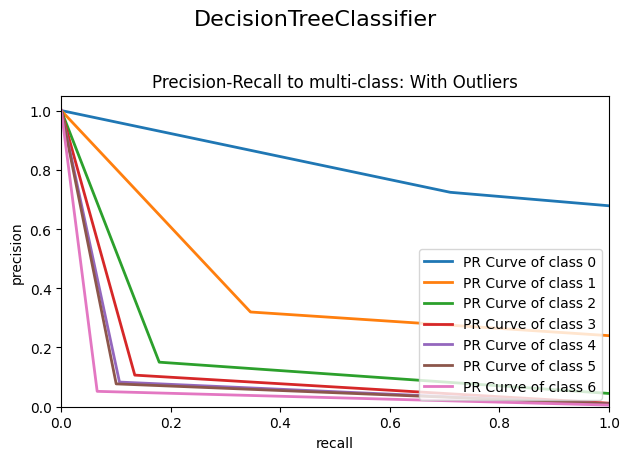

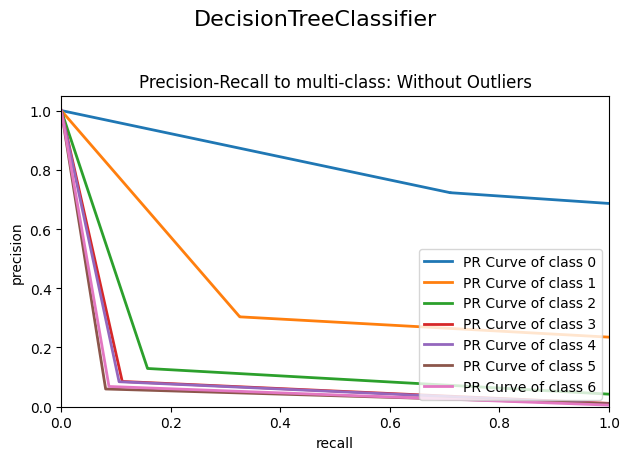

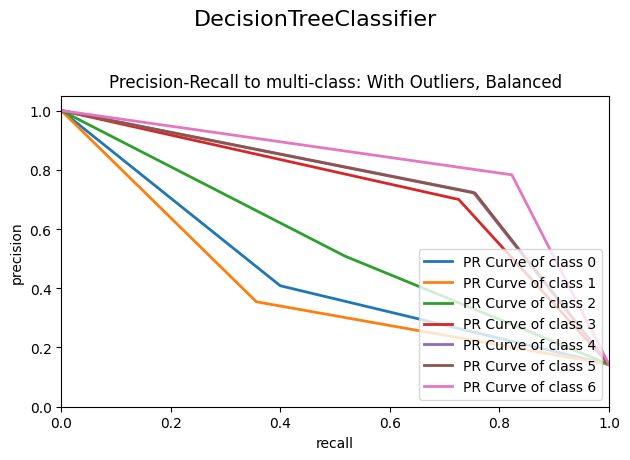

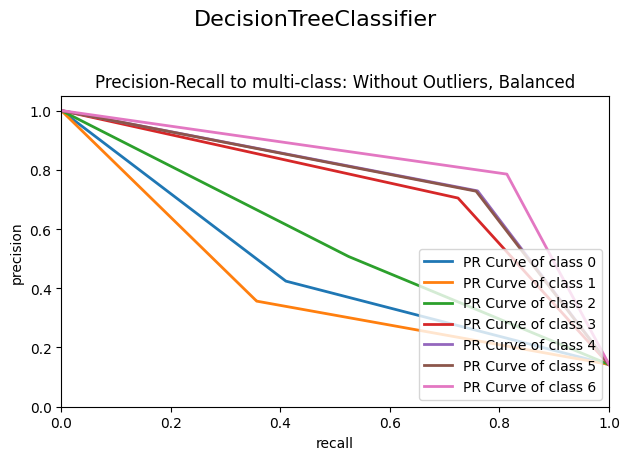

In [21]:
dtc = DecisionTreeClassifier(random_state = 13)
dtc.fit(X_train_df3, y_train_df3)
y_pred = dtc.predict(X_test_df3[i])

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            dtc,
                            "With Outliers, Balanced")

plt.show()

Precision: fraction of positive predictions that *actually* belong to positive class
$$\frac{TP}{TP + FP}$$

Recall: fraction of positive predictions out of all positive instances in the data set
$$\frac{TP}{TP + FN}$$


https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

### Hyperparameter Tuning

Avaliable Parameters:
- Splitter (best, random)
  - strategy used to split at each node
- Max Depth
  - maximum depth of tree
- Max Features (int, float, sqrt, log2)
  - number of features to consider when loking for best split
- Min Impurity Decrease (float)
  - node will be split if split induces a decrease of the impurity greater than equal to this value

In [ ]:
# use random search a couple times to narrow down
# then use grid search

dtc = DecisionTreeClassifier(random_state = 13)

param_grid = {"splitter": ["best", "random"],
              "max_depth": range(2, 10),
              "max_features": [5, 6, 7, 8]}

split = []
max_depths = []
max_features = []

for i in range(10):
  ran_search = RandomizedSearchCV(dtc, param_grid,
                                  scoring = "f1_micro")
  ran_search.fit(X_train_df3, y_train_df3)

  split.append(ran_search.best_params_["splitter"])
  max_depths.append(ran_search.best_params_["max_depth"])
  max_features.append(ran_search.best_params_["max_features"])

split = set(split)
max_depths = set(max_depths)
max_features = set(max_features)

split, max_depths, max_features

In [24]:
# grid search

dtc = DecisionTreeClassifier(random_state = 13)

param_grid = {"splitter": list(split),
              "max_depth": list(max_depths),
              "max_features": list(max_features)}

search = GridSearchCV(dtc, param_grid,
                      scoring = "f1_micro",
                      cv = 10)

search.fit(X_train_df3, y_train_df3)

best_estimator = search.best_estimator_
best_estimator

NameError: name 'split' is not defined

In [42]:
dtc = best_estimator

dtc_acc = []
dtc_preds = []
dtc_precision = []
dtc_recall = []
dtc_f1 = []

print("Scores:")

model = dtc.fit(X_train_df3, y_train_df3)

preds = model.predict(X_test_df3)
dtc_preds.append(preds)

# basic accuracy
acc = accuracy_score(y_test_df3, preds)
dtc_acc.append(acc)

# precision
prec = precision_score(y_test_df3, preds, average = "micro")
# micro calculates globally by counting the total true positives,
# false negatives, and false positives
dtc_precision.append(prec)

# recall
recall = recall_score(y_test_df3, preds, average = "micro")
# micro calculates globally by counting the total true positives,
# false negatives, and false positives
dtc_recall.append(recall)

# f1_score
f1 = f1_score(y_test_df3, preds, average = "weighted")
dtc_f1.append(f1)

print("Accuracy With Outliers: ", acc)
print("Precision With Outliers: ", prec)
print("Recall With Outliers: ", recall)
print("F1 With Outliers: ", f1)


Scores:
Accuracy With Outliers:  0.6897666666666666
Precision With Outliers:  0.6897666666666666
Recall With Outliers:  0.6897666666666666
F1 With Outliers:  0.5916837604655416

Accuracy Without Outliers:  0.6903466666666667
Precision Without Outliers:  0.6903466666666667
Recall Without Outliers:  0.6903466666666667
F1 Without Outliers:  0.5820738437367311

Accuracy With Outliers, Balanced:  0.35839333333333334
Precision With Outliers, Balanced:  0.35839333333333334
Recall With Outliers, Balanced:  0.35839333333333334
F1 With Outliers, Balanced:  0.33505978516289664

Accuracy Without Outliers, Balanced: 0.14238
Precision Without Outliers, Balanced: 0.14238
Recall Without Outliers, Balanced: 0.14238
F1 Without Outliers, Balanced:  0.1362762996891682


## Random Forest Classifier

In [43]:
rfc = RandomForestClassifier()

rfc_acc = []
rfc_precision = []
rfc_recall = []
rfc_f1 = []

print("Scores:")

for i in range(len(train_X)):
  model = rfc.fit(train_X[i], np.ravel(train_y[i]))

  preds = model.predict(test_X[i])

  # basic accuracy
  acc = accuracy_score(test_y[i], preds)
  rfc_acc.append(acc)

  # precision
  prec = precision_score(test_y[i], preds, average = "weighted")
  rfc_precision.append(prec)

  # recall
  recall = recall_score(test_y[i], preds, average = "weighted")
  rfc_recall.append(recall)

  # f1
  f1 = f1_score(test_y[i], preds, average = "weighted")
  rfc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outliers, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

Scores:
Accuracy With Outliers:  0.69414
Precision With Outliers:  0.69414
Recall With Outliers:  0.69414
F1 With Outliers:  0.6188913716205444

Accuracy Without Outliers:  0.6904266666666666
Precision Without Outliers:  0.6904266666666666
Recall Without Outliers:  0.6904266666666666
F1 Without Outliers:  0.6077623900665896

Accuracy With Outliers, Balanced:  0.7540533333333334
Precision With Outliers, Balanced:  0.7540533333333334
Recall With Outliers, Balanced:  0.7540533333333334
F1 With Outliers, Balanced:  0.7428387826416185

Accuracy Without Outliers, Balanced: 0.14258666666666667
Precision Without Outliers, Balanced: 0.14258666666666667
Recall Without Outliers, Balanced: 0.14258666666666667
F1 Without Outliers, Balanced:  0.14238193383020545


Moving forward with df3: With Outliers, Balanced

<ipython-input-44-8589d2ea109f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X[i], train_y[i])


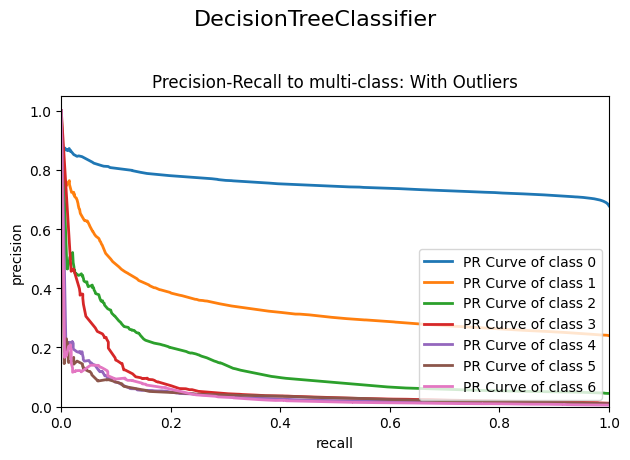

<ipython-input-44-8589d2ea109f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X[i], train_y[i])


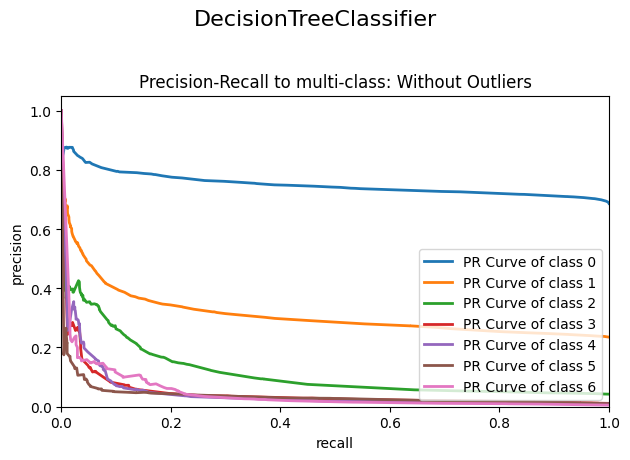

<ipython-input-44-8589d2ea109f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X[i], train_y[i])


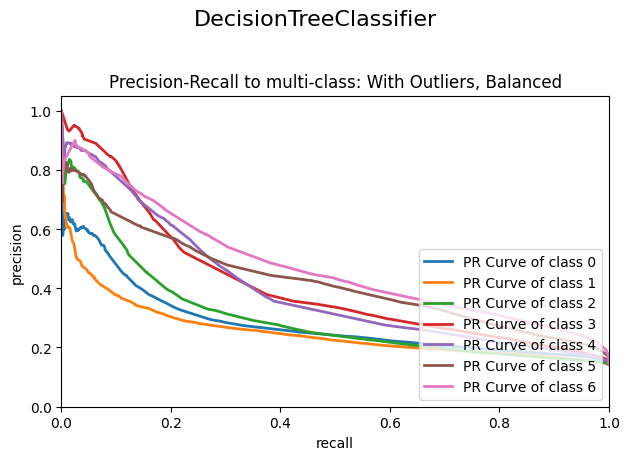

<ipython-input-44-8589d2ea109f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X[i], train_y[i])


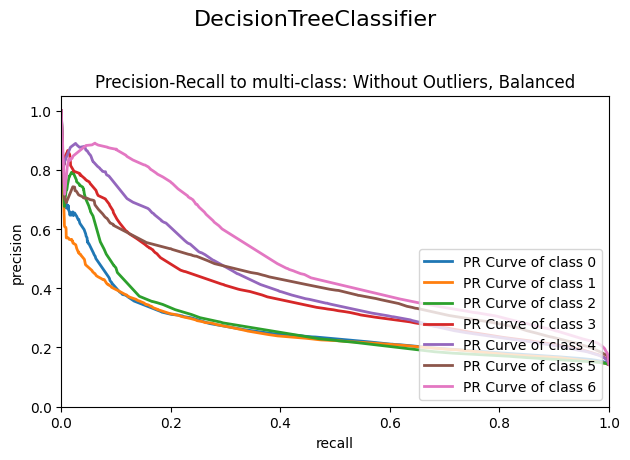

In [44]:
rfc = RandomForestClassifier(random_state = 13)
rfc.fit(X_train_df3, np.ravel(y_train_df3))
y_pred = rfc.predict(X_test_df3)

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            rfc,
                            "With Outliers, Balanced")

plt.show()

#### Hyperparameter Tuning
- n_estimators
  - number of trees in the forest
- max_depth
  - maximum depth of the tree
- max_features
  - number of faetures to consider
- bootstrap
  - whether bootstrap samples are used to build each tree

In [45]:
# use random search a couple times to narrow down
# then use grid search

rfc = RandomForestClassifier(random_state = 13)

param_grid = {"n_estimators": range(2, 7),
              "max_depth": range(2, 10),
              "max_features": [1, 2, 3, 4, 5, 6, 7, 8],
              "bootstrap": [True, False]}

n_estimators = []
max_depth = []
max_features = []
bootstrap = []

for i in range(10):
  ran_search = RandomizedSearchCV(rfc, param_grid,
                                  scoring = "f1_micro")
  ran_search.fit(X_train_df3, np.ravel(y_train_df3))

  n_estimators.append(ran_search.best_params_["n_estimators"])
  max_depth.append(ran_search.best_params_["max_depth"])
  max_features.append(ran_search.best_params_["max_features"])
  bootstrap.append(ran_search.best_params_["bootstrap"])

n_estimators = set(n_estimators)
max_depth = set(max_depth)
max_features = set(max_features)
bootstrap = set(bootstrap)

n_estimators, max_depth, max_features, bootstrap

({2, 4, 6}, {7, 8, 9}, {2, 4, 6, 7}, {False, True})

In [46]:
# grid search

rfc = RandomForestClassifier(random_state = 13)

param_grid = {"n_estimators": list(n_estimators),
              "max_depth": list(max_depth),
              "max_features": list(max_features),
              "bootstrap": list(bootstrap)}

search = GridSearchCV(rfc, param_grid,
                      scoring = "f1_micro",
                      cv = 10)

search.fit(X_train_df3, np.ravel(y_train_df3))

best_estimator = search.best_estimator_
best_estimator

RandomForestClassifier(bootstrap=False, max_depth=9, max_features=4,
                       n_estimators=6, random_state=13)

## K Nearest Neighbors

In [47]:
knc = KNeighborsClassifier(n_neighbors = 3)

knc_acc = []
knc_precision = []
knc_recall = []
knc_f1 = []

print("Scores:")

for i in range(len(train_X)):
  model = knc.fit(train_X[i], np.ravel(train_y[i]))

  preds = model.predict(test_X[i])

  # basic accuracy
  acc = accuracy_score(test_y[i], preds)
  knc_acc.append(acc)

  # precision
  prec = precision_score(test_y[i], preds, average = "weighted")
  knc_precision.append(prec)

  # recall
  recall = recall_score(test_y[i], preds, average = "weighted")
  knc_recall.append(recall)

  # f1
  f1 = f1_score(test_y[i], preds, average = "weighted")
  knc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outlier, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

Scores:
Accuracy With Outliers:  0.6538533333333333
Precision With Outliers:  0.6538533333333333
Recall With Outliers:  0.6538533333333333
F1 With Outliers:  0.6176881596702147

Accuracy Without Outliers:  0.6545333333333333
Precision Without Outliers:  0.6545333333333333
Recall Without Outliers:  0.6545333333333333
F1 Without Outliers:  0.6169052858241236

Accuracy With Outliers, Balanced:  0.7266933333333333
Precision With Outliers, Balanced:  0.7266933333333333
Recall With Outliers, Balanced:  0.7266933333333333
F1 With Outlier, Balanced:  0.7081685108227281

Accuracy Without Outliers, Balanced: 0.14172666666666667
Precision Without Outliers, Balanced: 0.14172666666666667
Recall Without Outliers, Balanced: 0.14172666666666667
F1 Without Outliers, Balanced:  0.14105333446166057


Moving Forward with df3, With Outliers, Balanced.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


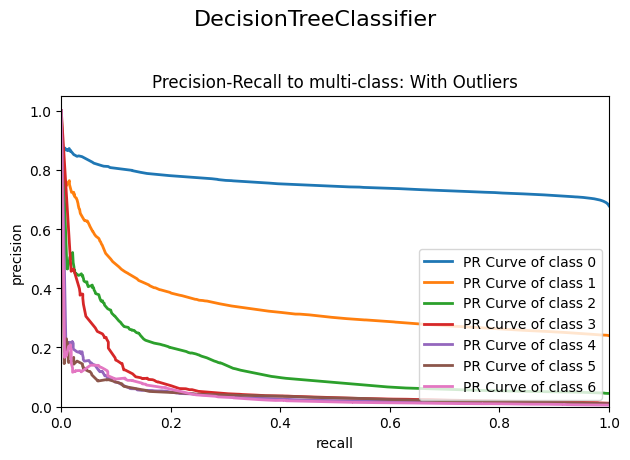

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


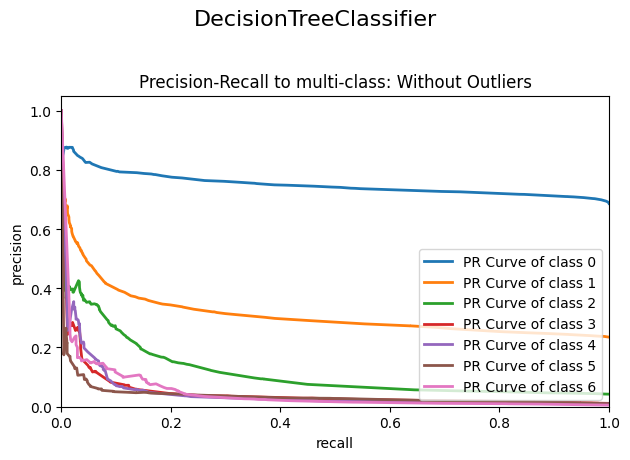

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


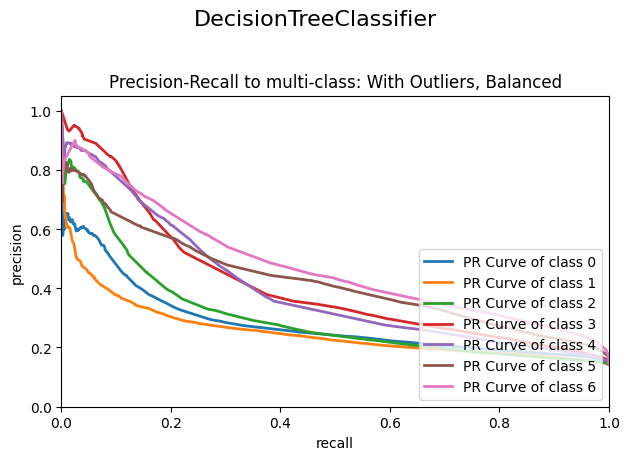

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


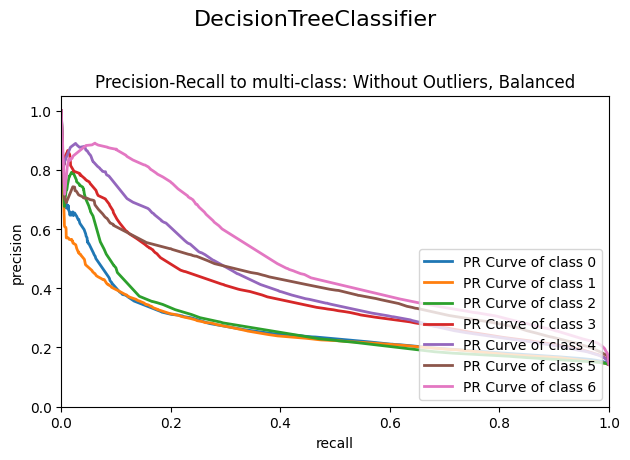

In [48]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train_df3, y_train_df3)
y_pred = knc.predict(X_test_df3)

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            knc,
                            "With Outliers, Balanced")
  plt.show()

#### Hyperparameter Tuning

Parameters:
- n_neighbors
  - number of neighbors to use
- weights (uniform, distance)
  - weight function used in prediction
- algorithm (ball_tree, kd_tree, brute, auto)
  - algorithm used to compute nearest neighbor

In [ ]:
# use random search a couple times to narrow down
# then use grid search

knc = KNeighborsClassifier()

param_grid = {"n_neighbors": range(3, 7),
              "weights": ["uniform", "distance"],
              "algorithm": ["ball_tree", "kd_tree", "brute"]}

n_neighbors = []
weights = []
algorithm = []

for i in range(10):
  ran_search = RandomizedSearchCV(knc, param_grid,
                                  scoring = "f1_micro")
  ran_search.fit(X_train_df3, np.ravel(y_train_df3))

  n_neighbors.append(ran_search.best_params_["n_neighbors"])
  weights.append(ran_search.best_params_["weights"])
  algorithm.append(ran_search.best_params_["algorithm"])

n_neighbors = set(n_neighbors)
weights = set(weights)
algorithm = set(algorithm)

n_neighbors, weights, algorithm

In [ ]:
# grid search

knc = KNeighborsClassifier()

param_grid = {"n_neighbors": list(n_neighbors),
              "weights": list(weights),
              "algorithm": list(algorithm)}

search = GridSearchCV(knc, param_grid,
                      cv = 10)

search.fit(X_train_df3, np.ravel(y_train_df3))

best_estimator = search.best_estimator_
best_estimator

## XGBoost Classifier

In [ ]:
# encode y to be numerical for xgboost
le = LabelEncoder()

for i in range(len(train_y)):
  train_y[i] = le.fit_transform(np.ravel(train_y[i]))
  test_y[i] = le.transform(np.ravel(test_y[i]))

In [ ]:
xgb = XGBClassifier()

xgb_acc = []
xgb_precision = []
xgb_recall = []
xgb_f1 = []

print("Scores:")

for i in range(len(train_X)):
  model = xgb.fit(train_X[i], train_y[i])

  preds = model.predict(test_X[i])

  # basic accuracy
  acc = accuracy_score(test_y[i], preds)
  xgb_acc.append(acc)

  # precision
  prec = precision_score(test_y[i], preds, average = "micro")
    # micro calculates globally by counting the total true positives,
    # false negatives, and false positives
  xgb_precision.append(prec)

  # recall
  recall = recall_score(test_y[i], preds, average = "micro")
    # micro calculates globally by counting the total true positives,
    # false negatives, and false positives
  xgb_recall.append(recall)

  # f1
  f1 = f1_score(test_y[i], preds, average = "weighted")
  xgb_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outlier, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

In [ ]:
# label encode y
le = LabelEncoder()
y_train_df3 = le.fit_transform(np.ravel(y_train_df3))


xgb = XGBClassifier()
xgb.fit(X_train_df3, y_train_df3)
y_pred = xgb.predict(X_test_df3)
y_proba = xgb.predict(X_test_df3)

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            xgb,
                            "Accuracy With Outliers, Balanced")

### Hyperparameter Tuning

Parameters:
- max_depth
  - maximum depth of each decision tree
- learning rate
  - step size shrinkage to prevent overfitting
- n_estimators
  - number of boosting iterations
  - controls complexity of model

In [ ]:
# use random search a couple times to narrow down
# then use grid search

knc = KNeighborsClassifier()

param_grid = {"n_neighbors": range(3, 7),
              "weights": ["uniform", "distance"],
              "algorithm": ["ball_tree", "kd_tree", "brute"]}

n_neighbors = []
weights = []
algorithm = []

for i in range(10):
  ran_search = RandomizedSearchCV(knc, param_grid,
                                  scoring = "f1_micro")
  ran_search.fit(X_train_df3, np.ravel(y_train_df3))

  n_neighbors.append(ran_search.best_params_["n_neighbors"])
  weights.append(ran_search.best_params_["weights"])
  algorithm.append(ran_search.best_params_["algorithm"])

n_neighbors = set(n_neighbors)
weights = set(weights)
algorithm = set(algorithm)

n_neighbors, weights, algorithm

In [ ]:
# grid search

knc = KNeighborsClassifier()

param_grid = {"n_neighbors": list(n_neighbors),
              "weights": list(weights),
              "algorithm": list(algorithm)}

search = GridSearchCV(knc, param_grid,
                      cv = 10)

search.fit(X_train_df3, np.ravel(y_train_df3))

best_estimator = search.best_estimator_
best_estimator